Data Cleaning

In [4]:
import pandas as pd
import numpy as np
from google.colab import files

In [5]:
uploaded = files.upload()

Saving NOTEEVENTS.csv to NOTEEVENTS.csv


In [7]:
df1 = pd.read_csv("NOTEEVENTS.csv")
df1 = df1.drop(columns=['chartdate', 'category'])
df1

,Unnamed: 0,subject_id,text
0,0,0,"CHIEF COMPLAINT: , Blood in urine.,HISTORY OF ..."
1,1,0,"CHIEF COMPLAINT: , Blood in urine.,HISTORY OF ..."
2,2,0,"CHIEF COMPLAINT: , Blood in urine.,HISTORY OF ..."
3,3,0,"CHIEF COMPLAINT:, Followup on hypertension an..."
4,4,0,"CHIEF COMPLAINT: , Blood in urine.,HISTORY OF ..."
...,...,...,...
2125,2125,297,"INDICATIONS FOR PROCEDURE:, A 51-year-old, obe..."
2126,2126,298,"HISTORY OF PRESENT ILLNESS:, The patient is a..."
2127,2127,298,"HISTORY OF PRESENT ILLNESS:, The patient is a..."
2128,2128,298,"HISTORY OF PRESENT ILLNESS:, The patient is a..."


In [8]:
df = df1.drop_duplicates(subset="text")
df.reset_index(inplace=True)
df = df.drop(columns=["index", "Unnamed: 0"])
df

,subject_id,text
0,0,"CHIEF COMPLAINT: , Blood in urine.,HISTORY OF ..."
1,0,"CHIEF COMPLAINT:, Followup on hypertension an..."
2,1,"HISTORY OF PRESENT ILLNESS:, The patient is a ..."
3,1,"HISTORY OF PRESENT ILLNESS: , A 71-year-old fe..."
4,2,"CHIEF COMPLAINT:,1. Infection.,2. Pelvic pai..."
...,...,...
255,284,"REASON FOR VISIT: , This is a cosmetic consult..."
256,292,"CHIEF COMPLAINT:, A 74-year-old female patien..."
257,292,"CHIEF COMPLAINT: , Nausea and feeling faint.,H..."
258,298,"HISTORY OF PRESENT ILLNESS:, The patient is a..."


In [9]:
notes = list(df["text"])
notes

["CHIEF COMPLAINT: , Blood in urine.,HISTORY OF PRESENT ILLNESS:  ,This is a 78-year-old male who has prostate cancer with metastatic disease to his bladder and in several locations throughout the skeletal system including the spine and shoulder.  The patient has had problems with hematuria in the past, but the patient noted that this episode began yesterday, and today he has been passing principally blood with very little urine.  The patient states that there is no change in his chronic lower back pain and denies any incontinence of urine or stool.  The patient has not had any fever.  There is no abdominal pain and the patient is still able to pass urine.  The patient has not had any melena or hematochezia.  There is no nausea or vomiting.  The patient has already completed chemotherapy and is beyond treatment for his cancer at this time.  The patient is receiving radiation therapy, but it is targeted to the bones and intended to give symptomatic relief of his skeletal pain and not in

In [10]:
len(notes)

260

In [11]:
parsed_notes = []
for note in notes:
  parsed_notes.append(note.split(","))
parsed_notes

[['CHIEF COMPLAINT: ',
  ' Blood in urine.',
  'HISTORY OF PRESENT ILLNESS:  ',
  'This is a 78-year-old male who has prostate cancer with metastatic disease to his bladder and in several locations throughout the skeletal system including the spine and shoulder.  The patient has had problems with hematuria in the past',
  ' but the patient noted that this episode began yesterday',
  ' and today he has been passing principally blood with very little urine.  The patient states that there is no change in his chronic lower back pain and denies any incontinence of urine or stool.  The patient has not had any fever.  There is no abdominal pain and the patient is still able to pass urine.  The patient has not had any melena or hematochezia.  There is no nausea or vomiting.  The patient has already completed chemotherapy and is beyond treatment for his cancer at this time.  The patient is receiving radiation therapy',
  ' but it is targeted to the bones and intended to give symptomatic relief 

In [12]:
len(parsed_notes)

260

In [13]:
df["parsed_text"] = parsed_notes
df

,subject_id,text,parsed_text
0,0,"CHIEF COMPLAINT: , Blood in urine.,HISTORY OF ...","[CHIEF COMPLAINT: , Blood in urine., HISTORY ..."
1,0,"CHIEF COMPLAINT:, Followup on hypertension an...","[CHIEF COMPLAINT:, Followup on hypertension ..."
2,1,"HISTORY OF PRESENT ILLNESS:, The patient is a ...","[HISTORY OF PRESENT ILLNESS:, The patient is ..."
3,1,"HISTORY OF PRESENT ILLNESS: , A 71-year-old fe...","[HISTORY OF PRESENT ILLNESS: , A 71-year-old ..."
4,2,"CHIEF COMPLAINT:,1. Infection.,2. Pelvic pai...","[CHIEF COMPLAINT:, 1. Infection., 2. Pelvic ..."
...,...,...,...
255,284,"REASON FOR VISIT: , This is a cosmetic consult...","[REASON FOR VISIT: , This is a cosmetic consu..."
256,292,"CHIEF COMPLAINT:, A 74-year-old female patien...","[CHIEF COMPLAINT:, A 74-year-old female pati..."
257,292,"CHIEF COMPLAINT: , Nausea and feeling faint.,H...","[CHIEF COMPLAINT: , Nausea and feeling faint...."
258,298,"HISTORY OF PRESENT ILLNESS:, The patient is a...","[HISTORY OF PRESENT ILLNESS:, The patient is..."


In [14]:
df['parsed_text'][0]

['CHIEF COMPLAINT: ',
 ' Blood in urine.',
 'HISTORY OF PRESENT ILLNESS:  ',
 'This is a 78-year-old male who has prostate cancer with metastatic disease to his bladder and in several locations throughout the skeletal system including the spine and shoulder.  The patient has had problems with hematuria in the past',
 ' but the patient noted that this episode began yesterday',
 ' and today he has been passing principally blood with very little urine.  The patient states that there is no change in his chronic lower back pain and denies any incontinence of urine or stool.  The patient has not had any fever.  There is no abdominal pain and the patient is still able to pass urine.  The patient has not had any melena or hematochezia.  There is no nausea or vomiting.  The patient has already completed chemotherapy and is beyond treatment for his cancer at this time.  The patient is receiving radiation therapy',
 ' but it is targeted to the bones and intended to give symptomatic relief of his 

Build Base Model w/ BERT

In [15]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 3.9 MB/s 
     |████████████████████████████████| 4.4 MB 46.1 MB/s 
     |████████████████████████████████| 1.2 MB 46.8 MB/s 
     |████████████████████████████████| 101 kB 14.5 MB/s 
     |████████████████████████████████| 596 kB 60.5 MB/s 
     |████████████████████████████████| 6.6 MB 42.9 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=df876ff4c96ff44df41928f50215ca938aefcb556a80a4091fba2ca53b868514
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [16]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

In [17]:
embedder = SentenceTransformer('all-mpnet-base-v2') # all-MiniLM-L6-v2

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [18]:
notes_embeddings = []
i=0
for parsed_note in parsed_notes:
  note_embedding = embedder.encode(parsed_note)
  notes_embeddings.append(note_embedding)
  print("iteration", i)
  i+=1
  print(notes_embeddings)
notes_embeddings

Streaming output truncated to the last 5000 lines.
       [ 0.08957241, -0.02163992,  0.03794277, ...,  0.02480279,
        -0.05056006,  0.00996027],
       [ 0.04538368,  0.01420537,  0.00749358, ...,  0.02780946,
        -0.0373412 , -0.02282008],
       ...,
       [ 0.04641282,  0.01293015, -0.00796622, ..., -0.00122301,
        -0.03853396, -0.04858612],
       [ 0.05642136,  0.00624005,  0.01885382, ...,  0.00559806,
        -0.03734825, -0.00665796],
       [ 0.018672  ,  0.10197388, -0.02723143, ...,  0.00421225,
        -0.01251596, -0.04652123]], dtype=float32), array([[-1.0536240e-02,  6.8350054e-02,  9.0769213e-03, ...,
         2.2651350e-02, -2.2207223e-02, -6.1958238e-02],
       [ 1.1682481e-02, -2.7890695e-02, -3.8649130e-03, ...,
         1.4022885e-02, -1.7943045e-02,  4.0513873e-02],
       [ 9.6890675e-03, -1.9399427e-02,  2.5270341e-03, ...,
         2.3663089e-02, -3.4350749e-02,  1.6399539e-05],
       ...,
       [ 5.5351868e-02, -9.9011533e-02,  5.6965724e-02

[array([[ 0.03809533,  0.0174614 ,  0.02720762, ...,  0.02535202,
         -0.06328279, -0.02332756],
        [ 0.04767027, -0.02684803,  0.02966231, ..., -0.01795313,
          0.01470741,  0.02047423],
        [-0.01053624,  0.06835005,  0.00907692, ...,  0.02265135,
         -0.02220722, -0.06195824],
        ...,
        [ 0.00706569,  0.04466607,  0.00185911, ...,  0.00435436,
         -0.01795243,  0.00119472],
        [ 0.0210832 ,  0.05120127, -0.02764891, ...,  0.02052857,
         -0.07657194, -0.06582657],
        [ 0.02557941, -0.04325191,  0.00354598, ...,  0.02031283,
         -0.04653755, -0.02223436]], dtype=float32),
 array([[ 0.03809533,  0.0174614 ,  0.02720762, ...,  0.02535202,
         -0.06328279, -0.02332756],
        [ 0.01035763, -0.00838416,  0.04354576, ...,  0.03494594,
         -0.04255711, -0.05976926],
        [-0.00903828,  0.07932662,  0.00116203, ...,  0.02550618,
          0.04688952,  0.0294378 ],
        ...,
        [-0.01193996,  0.00894024, -0.0

In [19]:
len(notes_embeddings)

260

In [20]:
num_tokens = []
for i in range(len(parsed_notes)):
  num_tokens.append(len(parsed_notes[i]))
num_tokens

[80,
 46,
 71,
 51,
 46,
 32,
 31,
 37,
 60,
 61,
 79,
 33,
 63,
 68,
 22,
 145,
 92,
 93,
 26,
 30,
 33,
 60,
 18,
 79,
 62,
 51,
 32,
 62,
 71,
 14,
 65,
 59,
 66,
 57,
 37,
 66,
 111,
 45,
 52,
 62,
 47,
 56,
 67,
 31,
 39,
 56,
 54,
 20,
 64,
 45,
 92,
 134,
 35,
 72,
 23,
 80,
 65,
 16,
 100,
 28,
 69,
 22,
 54,
 38,
 75,
 26,
 42,
 76,
 28,
 19,
 18,
 68,
 20,
 39,
 61,
 59,
 10,
 77,
 62,
 55,
 18,
 62,
 76,
 74,
 48,
 139,
 85,
 50,
 21,
 47,
 32,
 10,
 44,
 53,
 39,
 17,
 39,
 4,
 93,
 110,
 45,
 42,
 56,
 23,
 65,
 43,
 74,
 63,
 85,
 93,
 77,
 48,
 123,
 15,
 50,
 24,
 35,
 17,
 53,
 54,
 21,
 37,
 22,
 20,
 33,
 68,
 27,
 79,
 95,
 96,
 91,
 39,
 46,
 58,
 18,
 58,
 74,
 56,
 56,
 47,
 45,
 89,
 56,
 109,
 96,
 86,
 83,
 11,
 66,
 98,
 78,
 130,
 62,
 46,
 55,
 55,
 59,
 63,
 58,
 21,
 58,
 16,
 23,
 42,
 50,
 102,
 31,
 116,
 46,
 16,
 62,
 67,
 30,
 14,
 47,
 60,
 14,
 12,
 52,
 41,
 27,
 72,
 61,
 15,
 103,
 43,
 34,
 12,
 18,
 15,
 57,
 36,
 28,
 20,
 45,
 61,
 37,
 41,

In [21]:
for note, embedding in zip(notes, notes_embeddings):
    print("Note:", note)
    print("Embedding:", embedding)
    print("")

Note: CHIEF COMPLAINT: , Blood in urine.,HISTORY OF PRESENT ILLNESS:  ,This is a 78-year-old male who has prostate cancer with metastatic disease to his bladder and in several locations throughout the skeletal system including the spine and shoulder.  The patient has had problems with hematuria in the past, but the patient noted that this episode began yesterday, and today he has been passing principally blood with very little urine.  The patient states that there is no change in his chronic lower back pain and denies any incontinence of urine or stool.  The patient has not had any fever.  There is no abdominal pain and the patient is still able to pass urine.  The patient has not had any melena or hematochezia.  There is no nausea or vomiting.  The patient has already completed chemotherapy and is beyond treatment for his cancer at this time.  The patient is receiving radiation therapy, but it is targeted to the bones and intended to give symptomatic relief of his skeletal pain and no

In [30]:
max_len = max([len(i) for i in notes_embeddings])
max_len

145

In [37]:
min_len = min([len(i) for i in notes_embeddings])
min_len

4

In [36]:
len(notes_embeddings[0][0])

768

In [38]:
notes_embeddings[0][0][0]

0.038095333

Standardize Embedding Dimensions

In [70]:
# notes_embeddings dimensions: 260 notes -> 4~145 sentences per note -> 760 word embeddings per sentence
#                                         (standardize this dimension)
unit = np.zeros((1,768), dtype=np.float32)[0]
unit

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [79]:
test = notes_embeddings[0]
print(len(test[0]))
print("test length before:", len(test))
test = np.append(test, [unit], axis=0)
print("test length after:", len(test))
print(len(unit))
test

while len(test) is not 145:
  test = np.append(test, [unit], axis=0)

print("test length appended:", len(test))

768
test length before: 80
test length after: 81
768
test length appended: 145


In [85]:
padded_notes_embeddings = []
for note in notes_embeddings:
  while len(note) is not 145:
    note = np.append(note, [unit], axis=0)
  padded_notes_embeddings.append(note)

In [87]:
print(len(padded_notes_embeddings))
print(len(padded_notes_embeddings[0]))
print(len(padded_notes_embeddings[0][0]))

260
145
768


Reduce Model Dimensions

In [89]:
pne_dim = np.array(padded_notes_embeddings).shape
print(pne_dim)

(260, 145, 768)


In [93]:
test1 = padded_notes_embeddings[0]
print(test1.shape)
test1 = test1.flatten()
print(test1.shape)

(145, 768)
(111360,)


In [95]:
test_notes = padded_notes_embeddings
test_list = []
for test_note in test_notes:
  test_note = test_note.flatten()
  test_list.append(test_note)
print(np.array(test_list).shape)

(260, 111360)


In [96]:
flattened_padded_notes_embeddings = []
for padded_note in padded_notes_embeddings:
  padded_note = padded_note.flatten()
  flattened_padded_notes_embeddings.append(padded_note)
print(np.array(flattened_padded_notes_embeddings).shape)

(260, 111360)


Build Model

In [153]:
from sklearn.cluster import KMeans

num_clusters = 4
# Define kmeans model
clustering_model = KMeans(n_clusters=num_clusters)

# Fit the embedding with kmeans clustering.
clustering_model.fit(flattened_padded_notes_embeddings)

# Get the cluster id assigned to each note.
cluster_assignment = clustering_model.labels_

In [154]:
cluster_assignment

array([1, 3, 1, 3, 3, 3, 3, 3, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3, 3, 3, 1,
       3, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 3, 1, 3,
       3, 1, 1, 3, 1, 3, 1, 1, 3, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 1, 3, 1, 1, 1, 1,
       1, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 1, 3,
       3, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3,
       0, 3, 1, 1, 1, 3, 1, 3, 3, 3, 1, 1, 3, 1, 3, 3, 1, 1, 3, 3, 3, 1,
       3, 3, 1, 0, 3, 1, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3,
       1, 2, 1, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 2, 3, 3,
       3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 1, 1, 1, 3, 1, 1, 3, 3], dtype=int32)

In [155]:
unique, counts = np.unique(cluster_assignment, return_counts=True)
print(dict(zip(unique, counts)))

{0: 2, 1: 115, 2: 2, 3: 141}


Data Visualization

In [156]:
import seaborn as sns

In [157]:
print(len(notes_embeddings))
print(len(notes_embeddings[0]))
print(len(notes_embeddings[0][0]))

260
80
768


In [158]:
note_embedding_avgs = []
for note_embedding in notes_embeddings:
  sentence_embedding_avgs = []
  for sentence_embedding in note_embedding:
    sentence_embedding_avg = sum(sentence_embedding)/len(sentence_embedding)
    sentence_embedding_avgs.append(sentence_embedding_avg)
  note_embedding_avg = sum(sentence_embedding_avgs)/len(sentence_embedding_avgs)
  note_embedding_avgs.append(note_embedding_avg)
print(len(note_embedding_avgs))
note_embedding_avgs

260


[-0.00021805312912457844,
 -0.00013359656454261547,
 -0.00024049494854505422,
 -0.00013452422715956719,
 -0.00012415257433588976,
 -0.00019102651035897772,
 -4.742968767605316e-05,
 -0.00017188721802375442,
 -0.00021440706638875906,
 -0.000160085656275134,
 -0.00016009470643663863,
 -0.00022097862507755662,
 -0.0001494910920126228,
 -0.00020569947937919248,
 -0.00015289373299239814,
 -0.00017080387164491437,
 -0.0001764578474064054,
 -0.0001646381414660662,
 -0.0001497700523694883,
 -0.00017570297515203051,
 -0.00011896851930175411,
 -0.00015079276624393204,
 -0.00017374192612267436,
 -0.00013467671840527174,
 -0.00024491039587905977,
 -0.00012135601359957052,
 -0.00014436672709272058,
 -0.00015838598481700912,
 -0.00018490862884429983,
 -0.00026219949393209495,
 -0.00010357080736852177,
 -0.00019836600474324036,
 -0.00015060707287199,
 -0.00014698043465196243,
 -0.00023237929927747642,
 -0.00012734518900226762,
 -0.0001786547684159414,
 -0.00015302071229875337,
 -0.0001854071489585815

In [159]:
print(len(num_tokens))
print(len(note_embedding_avgs))

260
260


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


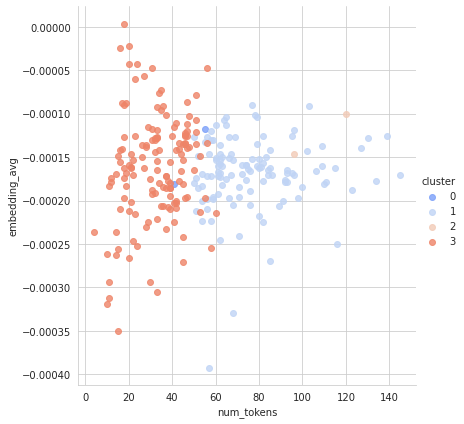

In [160]:
df['cluster'] = cluster_assignment
df['embedding_avg'] = note_embedding_avgs
df['num_tokens'] = num_tokens
sns.set_style('whitegrid')
sns.lmplot('num_tokens', 'embedding_avg', data=df, hue='cluster', palette='coolwarm', size=6, aspect=1, fit_reg=False)

In [161]:
df

,subject_id,text,parsed_text,cluster,embedding_avg,num_tokens
0,0,"CHIEF COMPLAINT: , Blood in urine.,HISTORY OF ...","[CHIEF COMPLAINT: , Blood in urine., HISTORY ...",1,-0.000218,80
1,0,"CHIEF COMPLAINT:, Followup on hypertension an...","[CHIEF COMPLAINT:, Followup on hypertension ...",3,-0.000134,46
2,1,"HISTORY OF PRESENT ILLNESS:, The patient is a ...","[HISTORY OF PRESENT ILLNESS:, The patient is ...",1,-0.000240,71
3,1,"HISTORY OF PRESENT ILLNESS: , A 71-year-old fe...","[HISTORY OF PRESENT ILLNESS: , A 71-year-old ...",3,-0.000135,51
4,2,"CHIEF COMPLAINT:,1. Infection.,2. Pelvic pai...","[CHIEF COMPLAINT:, 1. Infection., 2. Pelvic ...",3,-0.000124,46
...,...,...,...,...,...,...
255,284,"REASON FOR VISIT: , This is a cosmetic consult...","[REASON FOR VISIT: , This is a cosmetic consu...",3,-0.000130,31
256,292,"CHIEF COMPLAINT:, A 74-year-old female patien...","[CHIEF COMPLAINT:, A 74-year-old female pati...",1,-0.000162,81
257,292,"CHIEF COMPLAINT: , Nausea and feeling faint.,H...","[CHIEF COMPLAINT: , Nausea and feeling faint....",1,-0.000169,95
258,298,"HISTORY OF PRESENT ILLNESS:, The patient is a...","[HISTORY OF PRESENT ILLNESS:, The patient is...",3,-0.000203,41
